In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib widget
import numpy as np
import copy

In [5]:
class Cube:
    def __init__(self, starting_point:list[float, float, float], cube_edge_len:float):
        # Задаємо координати вершин куба
        close_right_down = [starting_point[0], starting_point[1], starting_point[2]] #  [2, 2, -2]
        far_right_down = [starting_point[0] + cube_edge_len, starting_point[1], starting_point[2]] # [4, 2, -2]
        close_right_up = [starting_point[0], starting_point[1], starting_point[2] + cube_edge_len] # [2, 2, 0]
        far_right_up = [starting_point[0] + cube_edge_len, starting_point[1], starting_point[2] + cube_edge_len] # [4, 2, 0]
        close_left_down = [starting_point[0], starting_point[1] + cube_edge_len, starting_point[2]] # [2, 4, -2]
        far_left_down = [starting_point[0] + cube_edge_len, starting_point[1] + cube_edge_len, starting_point[2]] # [4, 4, -2]
        close_left_up = [starting_point[0], starting_point[1] + cube_edge_len, starting_point[2] + cube_edge_len] # [2, 4, 0]
        far_left_up = [starting_point[0] + cube_edge_len, starting_point[1] + cube_edge_len, starting_point[2] + cube_edge_len] # [4, 4, 0]
        
        self.array = np.array([
            close_right_down, #0
            close_right_up, #1
            close_left_up, #2
            close_left_down, #3
            far_right_down, #4
            far_right_up, #5
            far_left_up, #6
            far_left_down]) #7
        
        self.array_4d = np.column_stack((self.array, np.array([1]*self.array.shape[0])))
        
        self.system_coordinates = np.array([
            [[-10, -abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[0])+abs(+cube_edge_len)>=10], 0, 0],
            [[10, abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[0])+abs(+cube_edge_len)>=10], 0, 0],
            [0, [-10, -abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[1])+abs(+cube_edge_len)>=10], 0],
            [0, [10, abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[1])+abs(+cube_edge_len)>=10], 0],
            [0, 0, [-10, -abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[2])+abs(+cube_edge_len)>=10]],
            [0, 0, [10, abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[2])+abs(+cube_edge_len)>=10]]])
    
    def update_array_4d(self):
        self.array_4d = np.column_stack((self.array, np.array([1]*self.array.shape[0])))
    
    def create_faces(self):
        # Initialize a list of vertex coordinates for each face
        self.faces = [np.zeros([5,3])]*6
        # right face
        self.faces[0] = np.array([
            self.array[0], 
            self.array[1], 
            self.array[2], 
            self.array[3], 
            self.array[0], 
        ])
        # left face
        self.faces[1] = np.array([
            self.array[4],
            self.array[5],
            self.array[6],
            self.array[7],
            self.array[4],
        ])
        # back Face
        self.faces[2] = np.array([
            self.array[0],
            self.array[1],
            self.array[5],
            self.array[4],
            self.array[0],
        ])
        # front Face
        self.faces[3] = np.array([
            self.array[2],
            self.array[3],
            self.array[7],
            self.array[6],
            self.array[2],
        ])
        # top face
        self.faces[4] = np.array([
            self.array[5],
            self.array[6],
            self.array[2],
            self.array[1],
            self.array[5],
        ])
        # bottom face
        self.faces[5] = np.array([
            self.array[4],
            self.array[7],
            self.array[3],
            self.array[0],
            self.array[4],
        ])
    
    def plot3d(self):
        self.create_faces()
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        # ax.scatter(cube[:, 0], cube[:, 1], cube[:, 2])
        ax.plot(self.system_coordinates[:, 0][:2], self.system_coordinates[:, 1][:2], self.system_coordinates[:, 2][:2])
        ax.plot(self.system_coordinates[:, 0][2:4], self.system_coordinates[:, 1][2:4], self.system_coordinates[:, 2][2:4])
        ax.plot(self.system_coordinates[:, 0][4:6], self.system_coordinates[:, 1][4:6], self.system_coordinates[:, 2][4:6])
        
        # plotting cube
        ax.add_collection3d(Poly3DCollection(self.faces, facecolors='cyan', linewidths=1, edgecolors='k', alpha=.25))

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.show()
    
    # Scaling
    def scale(self, num):
        for row_index in range(self.array.shape[0]):
            self.array[row_index] = self.array[row_index] * np.matrix([
                [num, 0, 0],
                [0, num, 0],
                [0, 0, num]
            ])
    
    def copy(self):
        return copy.deepcopy(self)

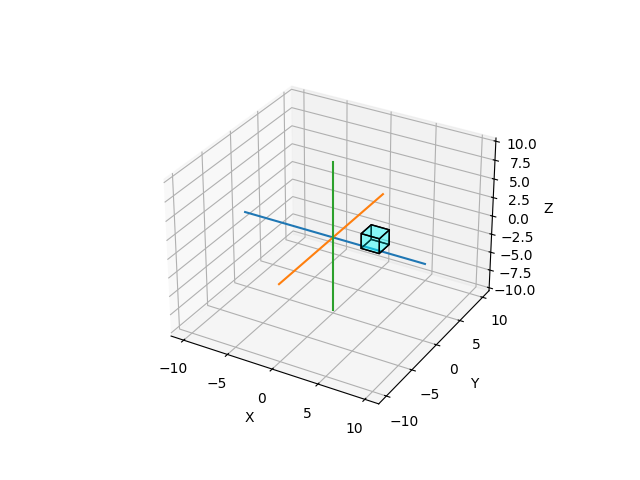

In [6]:
cube = Cube([2, 2, -2], 2)
cube.plot3d()

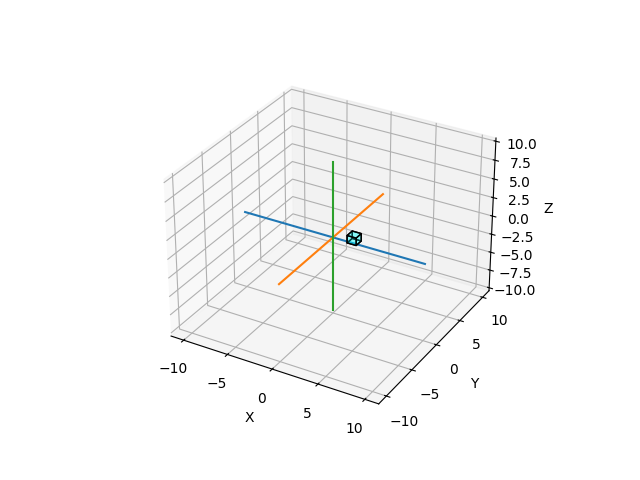

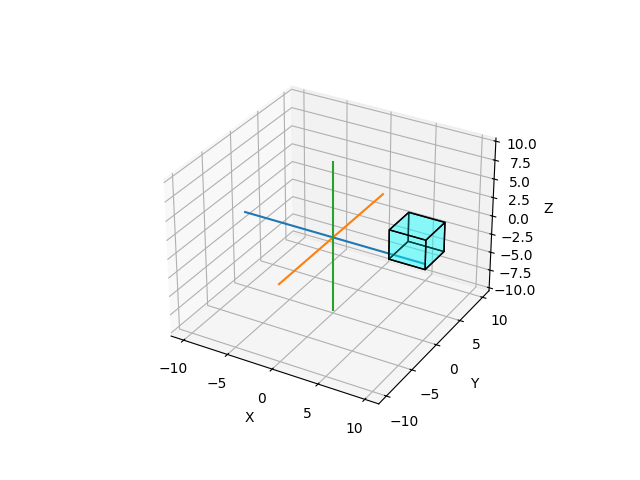

In [8]:
cube_scale_05 = cube.copy()
cube_scale_05.scale(0.5)
cube_scale_05.plot3d()

cube_scale_2 = cube.copy()
cube_scale_2.scale(2)
cube_scale_2.plot3d()

Дисципліна – «Комп’ютерна графіка»
Спеціальність – «Прикладна математика». НН ФТІ
ЗАВДАННЯ ДО ЛАБОРАТОРНОЇ РОБОТИ

1. Ознайомитись з теоретичними відомостями до лабораторної роботи.
Дослідити кожне перетворення (перетворення, масштабування, поворот,
відображення тощо) та їхні комбінації просторі. Ознайомитись з матеріалом,
який віднситься до проектування об’єктів на площину.
2. Задати куб через його вершини. Здійснити масштабування куба (збільшення,
зменшення у кілька разів). Записати відповідну матрицю.
3. Отриманий результат з попереднього пункту симетрично відобразити
відносно початку координат, відносно однієї з координатних площин у
тривимірній декартовій системі координат (простір).
4. Задати пряму як у прикладі 1 даної лабораторної роботи. Здійснити поворот
куба відносно прямої на деякий кут φ. Вказати перетворення, які необхідні
для одержання такого результату.
5. Задати площину, як у прикладі 2, здійснити симетрію куба відносно
площини, вказати всі математичні перетворення, показати кінцевий
результат, який відповідає вимогам задачі. Записати відповідні математичні
перетворення.
6. (для студентів, які навчаються на кафедрі ММАД) Запропонувати інший
набір перетворень для отримання результатів, які наведені у прикладі 2 даної
лабораторної роботи. Тобто здійснити інші перетворення за загальним
підходом (симетрія, поворот, перенесення), показати їх математично.
7. (для студентів, які навчаються на кафедрі ММАД) Запропонувати інший
набір перетворень для отримання результатів, які наведені у прикладі 2 даної
лабораторної роботи. Тобто здійснити інші перетворення за загальним
підходом (симетрія, поворот, перенесення), показати їх математично.
8. (для студентів, які навчаються на кафедрі ММАД) Навести алгоритм з
математичними перетвореннями для побудови симетрії відносно площини на
основі знань з аналітичної геометрії. Порівняти результати (програмно)
9. До пунктів 2–8 розробити програмне забезпечення (студентам кафедри ММЗІ
для пунктів 2–5). Навести результат виконання кожного пункту.
10. (для всіх студентів) Взяти той самий куб, який був поданий у попередніх
пунктах. Здійснити ортогональне проектування даного кубу на площину
загального виду, яка не паралельна жодній з координатних площин. Вказати
відповідні математичні перетворення, розробити відповідне програмне
забезпечення.